In [55]:
from sklearn.preprocessing import StandardScaler
import itertools
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [56]:
pwd = os.getcwd()
pwd

'c:\\Users\\pih\\OneDrive - Capital Four Management Fondsmæglerselskab A S\\notesPH\\personal\\school\\dtu\\compData\\case2\\compDataAnProject'

In [57]:
def load_csv_data(folder_path, file_name):
    file_path = f"{folder_path}/{file_name}"
    return pd.read_csv(file_path)

def load_excel_data(folder_path, file_name):
    file_path = f"{folder_path}/{file_name}"
    return pd.read_excel(file_path)

In [58]:
def combine_data(data_path):
    combined_data = []
    
    for day_folder in sorted(os.listdir(data_path)):
        day_path = os.path.join(data_path, day_folder)
        if not os.path.isdir(day_path):
            continue
            
        if day_folder == "D1_3":
            for d1_3_subfolder in sorted(os.listdir(day_path)):
                d1_3_subfolder_path = os.path.join(day_path, d1_3_subfolder)
                if not os.path.isdir(d1_3_subfolder_path):
                    continue
                
                for id_folder in sorted(os.listdir(d1_3_subfolder_path)):
                    process_id_folder(d1_3_subfolder_path, id_folder, combined_data)
        else:
            for id_folder in sorted(os.listdir(day_path)):
                process_id_folder(day_path, id_folder, combined_data)
                
    return combined_data

def process_id_folder(day_path, id_folder, combined_data):
    id_path = os.path.join(day_path, id_folder)
    if not os.path.isdir(id_path):
        return

    for round_folder in sorted(os.listdir(id_path)):
        round_path = os.path.join(id_path, round_folder)
        if not os.path.isdir(round_path):
            continue

        for phase_folder in sorted(os.listdir(round_path)):
            phase_path = os.path.join(round_path, phase_folder)
            if not os.path.isdir(phase_path):
                continue

            #print(f"Processing: {phase_path}")

            bvp_data = load_csv_data(phase_path, "BVP.csv")
            eda_data = load_csv_data(phase_path, "EDA.csv")
            hr_data = load_csv_data(phase_path, "HR.csv")
            temp_data = load_csv_data(phase_path, "TEMP.csv")
            response_data = load_csv_data(phase_path, "response.csv")

            combined_data.append({
                'day': os.path.split(day_path)[-1],
                'id': os.path.split(id_path)[-1],
                'round': os.path.split(round_path)[-1],
                'phase': os.path.split(phase_path)[-1],
                'bvp': bvp_data,
                'eda': eda_data,
                'hr': hr_data,
                'temp': temp_data,
                'response': response_data
            })

data_path = os.path.join(pwd, 'dataset')
combined_data = combine_data(data_path)

In [59]:
# Assuming combined_data is the list generated by the combine_data function
combined_dataframe = pd.DataFrame.from_records(combined_data)
combined_dataframe.head()

,day,id,round,phase,bvp,eda,hr,temp,response
0,D1_1,ID_1,round_1,phase1,Unnamed: 0 BVP ...,Unnamed: 0 EDA ...,Unnamed: 0 HR time 0 ...,Unnamed: 0 TEMP ti...,Unnamed: 0 particpant_ID puzzler team_ID...
1,D1_1,ID_1,round_1,phase2,Unnamed: 0 BVP ...,Unnamed: 0 EDA ...,Unnamed: 0 HR time 0 ...,Unnamed: 0 TEMP ti...,Unnamed: 0 particpant_ID puzzler team_ID...
2,D1_1,ID_1,round_1,phase3,Unnamed: 0 BVP ...,Unnamed: 0 EDA ...,Unnamed: 0 HR time 0 ...,Unnamed: 0 TEMP ti...,Unnamed: 0 particpant_ID puzzler team_ID...
3,D1_1,ID_1,round_2,phase1,Unnamed: 0 BVP ...,Unnamed: 0 EDA ...,Unnamed: 0 HR time 0 ...,Unnamed: 0 TEMP ti...,Unnamed: 0 particpant_ID puzzler team_ID...
4,D1_1,ID_1,round_2,phase2,Unnamed: 0 BVP ...,Unnamed: 0 EDA ...,Unnamed: 0 HR time 0 ...,Unnamed: 0 TEMP ti...,Unnamed: 0 particpant_ID puzzler team_ID...


In [ ]:
combined_dataframe.shape

(309, 9)

In [ ]:
# Example on how to grab specific instance
combined_dataframe.iloc[0,1]

'ID_1'

>### Explore the DataSet

In [ ]:
combined_dataframe.iloc[1,4].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25081 entries, 0 to 25080
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  25081 non-null  int64  
 1   BVP         25081 non-null  float64
 2   time        25081 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 588.0+ KB


>### Preproces the data

def scale_nested_data(data, scaler):
    # Create a new empty DataFrame with the same columns as the input data
    scaled_data = pd.DataFrame(columns=data.columns)

    for index, row in data.iterrows():
        # Scale the numerical data in each nested structure and store it in the new DataFrame
        for col in data.columns:
            if isinstance(row[col], pd.DataFrame):
                scaled_data.at[index, col] = pd.DataFrame(scaler.fit_transform(row[col]), columns=row[col].columns)
            else:
                # If the data is not a nested DataFrame, just copy the original value
                scaled_data.at[index, col] = row[col]

    return scaled_data

# Instantiate a StandardScaler
scaler = StandardScaler()

# Scale the nested numerical data in the combined_dataframe
scaled_dataframe = scale_nested_data(combinedy_dataframe, scaler)


>### EDA

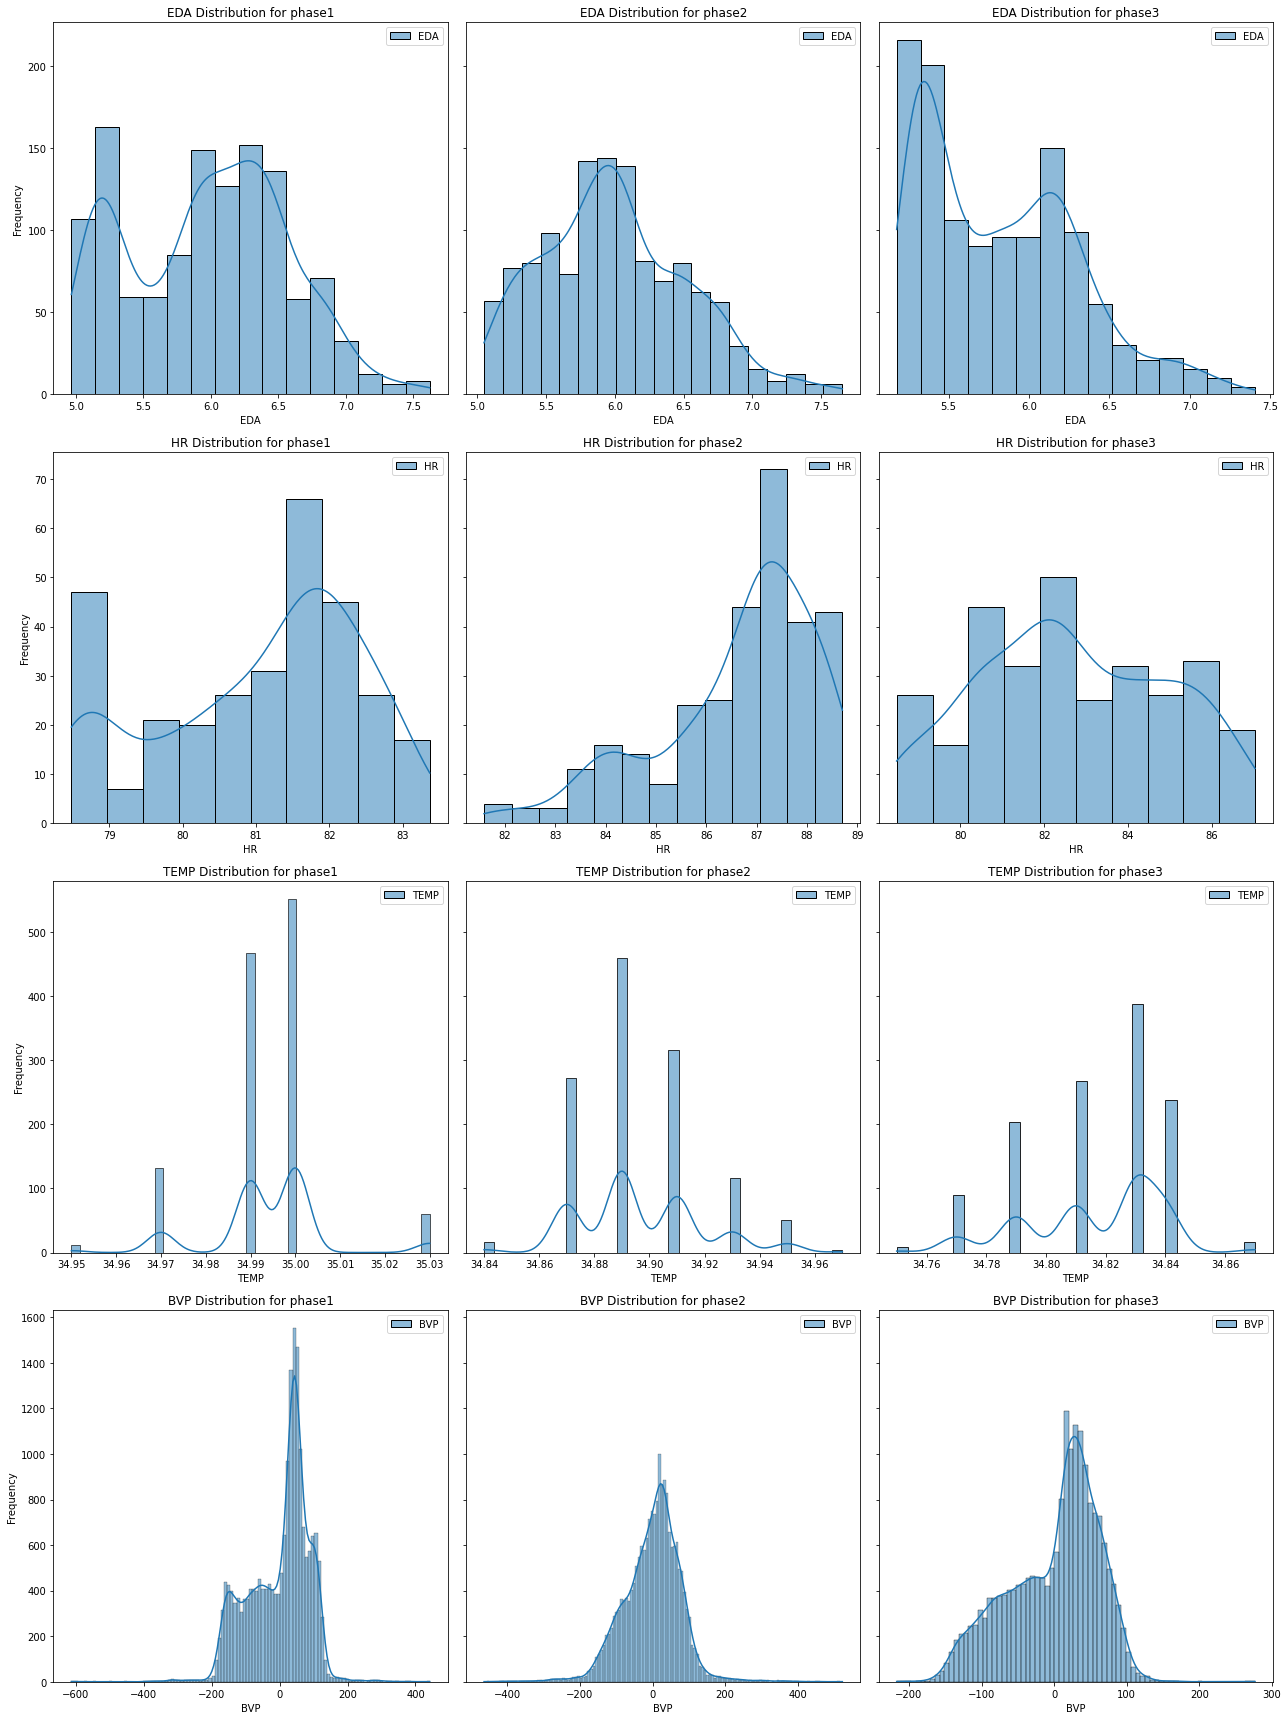

In [ ]:
biosignals = ['EDA', 'HR', 'TEMP', 'BVP']
num_biosignals = len(biosignals)
fig, axs = plt.subplots(num_biosignals, 3, figsize=(18, 6*num_biosignals), sharey='row')

for b_idx, biosignal in enumerate(biosignals):
    for p_idx, phase in enumerate(['phase1', 'phase2', 'phase3']):
        phase_data = combined_dataframe[combined_dataframe['phase'] == phase]
        signal_data = [row[biosignal] for row in phase_data[biosignal.lower()]]
        sns.histplot(signal_data, kde=True, ax=axs[b_idx, p_idx])
        axs[b_idx, p_idx].set_title(f"{biosignal} Distribution for {phase}")
        axs[b_idx, p_idx].set_xlabel(biosignal)
        axs[b_idx, p_idx].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [ ]:
measures = ['bvp', 'eda', 'hr', 'temp']
mean_correlations = {}

for phase in ['phase1', 'phase2', 'phase3']:
    phase_data = combined_dataframe[combined_dataframe['phase'] == phase]
    
    for measure1 in measures:
        for measure2 in measures:
            if measure1 == measure2:
                continue
            
            pair_key = f"{measure1}-{measure2}"
            if pair_key in mean_correlations:
                continue
            
            reverse_pair_key = f"{measure2}-{measure1}"
            correlations = []
            
            for index, row in phase_data.iterrows():
                data1 = row[measure1][measure1.upper()]
                data2 = row[measure2][measure2.upper()]

                # Resample the data1 to match the data2 length
                data1_resampled = np.interp(np.linspace(0, len(data1), len(data2)), np.arange(len(data1)), data1)

                # Calculate the correlation coefficient
                corr = np.corrcoef(data1_resampled, data2)[0, 1]
                correlations.append(corr)
                
            mean_correlations[pair_key] = np.mean(correlations)
            print(f"Mean correlation between {measure1.upper()} and {measure2.upper()} for {phase}: {mean_correlations[pair_key]}")

Mean correlation between BVP and EDA for phase1: -0.0009676605315073071
Mean correlation between BVP and HR for phase1: -0.009269866413157659
Mean correlation between BVP and TEMP for phase1: -0.0007536133375323417
Mean correlation between EDA and BVP for phase1: -0.0010706251689034064
Mean correlation between EDA and HR for phase1: 0.08560443557400428
Mean correlation between EDA and TEMP for phase1: 0.05321930065069875
Mean correlation between HR and BVP for phase1: -0.0005536726601530136
Mean correlation between HR and EDA for phase1: 0.08374125177626532
Mean correlation between HR and TEMP for phase1: 0.038120922840845436
Mean correlation between TEMP and BVP for phase1: -0.0007012073639035306
Mean correlation between TEMP and EDA for phase1: 0.05304376252742645
Mean correlation between TEMP and HR for phase1: 0.03791422465250846


In [ ]:
biosignals = ['EDA', 'HR', 'TEMP', 'BVP']
phases = ['phase1', 'phase2', 'phase3']
summary_stats = []

for biosignal in biosignals:
    for phase in phases:
        phase_data = combined_dataframe[combined_dataframe['phase'] == phase]
        signal_data = [row[biosignal] for row in phase_data[biosignal.lower()]]
        combined_signal_data = pd.concat(signal_data)
        
        mean = combined_signal_data.mean()
        median = combined_signal_data.median()
        std_dev = combined_signal_data.std()
        
        summary_stats.append({
            'biosignal': biosignal,
            'phase': phase,
            'mean': mean,
            'median': median,
            'std_dev': std_dev
        })

summary_stats_df = pd.DataFrame(summary_stats)
print(summary_stats_df)

   biosignal   phase       mean     median     std_dev
0        EDA  phase1   3.857538   1.720284    5.177970
1        EDA  phase2   4.012589   1.976328    5.549485
2        EDA  phase3   4.700242   2.145623    6.633378
3         HR  phase1  78.407848  75.350000   16.481008
4         HR  phase2  79.690057  77.820000   11.591195
5         HR  phase3  77.358128  75.025000   13.139806
6       TEMP  phase1  32.854726  32.840000    1.633297
7       TEMP  phase2  32.947887  32.930000    1.645779
8       TEMP  phase3  32.928010  32.810000    1.666456
9        BVP  phase1   0.014555   2.760000  107.902779
10       BVP  phase2  -0.017144   1.770000  131.028961
11       BVP  phase3  -0.006923   2.850000  130.285562
